<h1>Image classification using CNN on CIFAR10 Dataset</h1>

This dataset has 60000 32x32 colour images 

In [17]:
# import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# loading the data

import tensorflow as tf
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [19]:
# checking the shapes of the data imported

print("Shape of the X_train: ", X_train.shape)  # here 3 indicates RGB color channel
print("Shape of the X_test: ", X_test.shape)

Shape of the X_train:  (50000, 32, 32, 3)
Shape of the X_test:  (10000, 32, 32, 3)


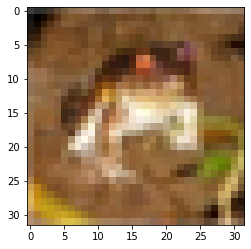

In [20]:
# to view the image of the first value of training data

plt.imshow(X_train[0])

In [21]:
classes = ['airplane','autombile','bird','cat','dear','frog','horse','ship','truck']

In [22]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [23]:
y_train_re = y_train.reshape(-1,)
y_train_re[:3]

array([6, 9, 9], dtype=uint8)

In [24]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

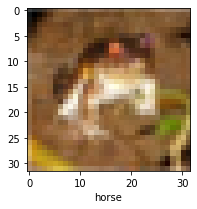

In [25]:
plot_sample(X_train, y_train_re, 0)

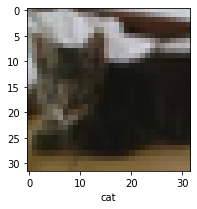

In [27]:
plot_sample(X_train, y_train_re, 9)

In [28]:
# normalize the data

X_train = X_train/255
X_test = X_test/255

In [44]:
# Trying for ANN architecture intially

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(3000, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='sigmoid'))

In [45]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [47]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8636 - accuracy: 0.3318 - val_loss: 1.7397 - val_accuracy: 0.3790
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6884 - accuracy: 0.4007 - val_loss: 1.6356 - val_accuracy: 0.4230
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6124 - accuracy: 0.4304 - val_loss: 1.5542 - val_accuracy: 0.4476
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5586 - accuracy: 0.4505 - val_loss: 1.5229 - val_accuracy: 0.4535
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5170 - accuracy: 0.4620 - val_loss: 1.5303 - val_accuracy: 0.4576
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4783 - accuracy: 0.4789 - val_loss: 1.4633 - val_accuracy: 0.4788
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4443 - accuracy: 0.4896 - val_loss: 1.5088 - val_ac

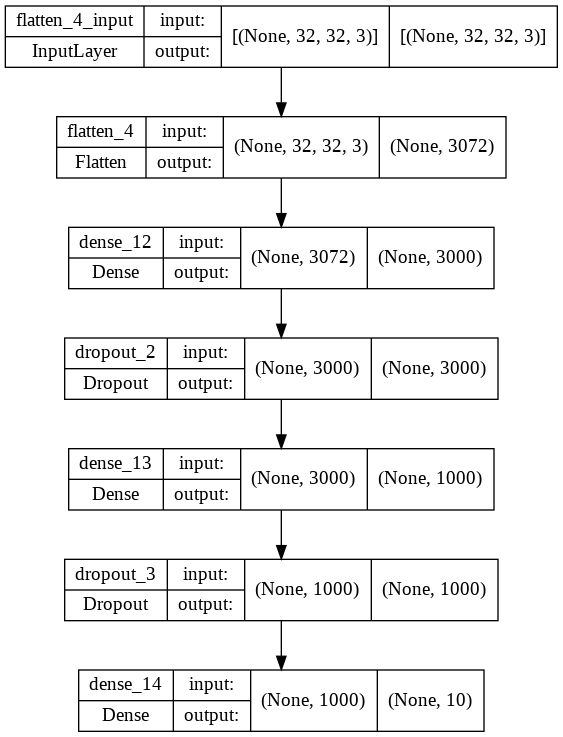

In [48]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,1.863620,0.33182,1.739657,0.3790
1,1.688410,0.40070,1.635555,0.4230
2,1.612367,0.43036,1.554188,0.4476
3,1.558598,0.45050,1.522943,0.4535
4,1.517046,0.46196,1.530341,0.4576
5,1.478263,0.47890,1.463286,0.4788
6,1.444259,0.48962,1.508833,0.4559
7,1.419182,0.49956,1.428349,0.4888
8,1.390668,0.50882,1.445731,0.4901
9,1.363963,0.51858,1.468774,0.4865


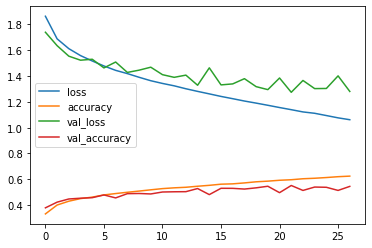

In [50]:
model_loss.plot()

In [57]:
pred = model.predict(X_test)
pred_classes = [np.argmax(element) for element in pred]

In [65]:
pred[:5]

array([[0.63461256, 0.6798228 , 0.62504417, 0.91744745, 0.67666286,
        0.7129959 , 0.40710643, 0.00444576, 0.85376096, 0.14351688],
       [0.9572216 , 0.9832971 , 0.17293556, 0.136412  , 0.09413432,
        0.00534523, 0.07799238, 0.02130963, 0.9992311 , 0.99408287],
       [0.9839865 , 0.835872  , 0.34155473, 0.10078289, 0.40510875,
        0.04010512, 0.01782871, 0.19990973, 0.9924159 , 0.82309324],
       [0.93506527, 0.42036194, 0.72824997, 0.34922394, 0.7489877 ,
        0.1268424 , 0.0256656 , 0.4574475 , 0.9608641 , 0.24278432],
       [0.09831215, 0.03127091, 0.90796   , 0.7900373 , 0.9906376 ,
        0.61432886, 0.9786532 , 0.13714302, 0.27524516, 0.02081645]],
      dtype=float32)

In [64]:
pred_classes[:5]

[3, 8, 8, 8, 4]

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_classes))
print(confusion_matrix(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.66      0.59      1000
           1       0.72      0.60      0.66      1000
           2       0.47      0.41      0.44      1000
           3       0.38      0.38      0.38      1000
           4       0.48      0.50      0.49      1000
           5       0.62      0.27      0.37      1000
           6       0.52      0.69      0.59      1000
           7       0.66      0.55      0.60      1000
           8       0.56      0.77      0.65      1000
           9       0.59      0.62      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000

[[662  19  28  11  27   2  24  12 179  36]
 [ 37 604   9  16   9   0  13  20 118 174]
 [115  11 406  75 151  27 128  38  31  18]
 [ 63  21  78 383  56  79 183  47  44  46]
 [ 84   7 112  54 500  14 124  54  41  10]
 [ 46   7  89 279  76 267 

* By using ANN we get accuracy of 55%

In [82]:
# Let's use CNN architeceture

from tensorflow.keras.layers import Conv2D, MaxPool2D
cnn = Sequential()
# CNN network
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))     # detecting the features in the images
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))     # detecting the features in the images
cnn.add(MaxPool2D(2,2))

# Dense network
cnn.add(Flatten())
cnn.add(Dense(3000, activation='relu'))
cnn.add(Dropout(rate=0.2))
cnn.add(Dense(1000, activation='relu'))
cnn.add(Dropout(rate=0.2))
cnn.add(Dense(10, activation='softmax'))

In [83]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

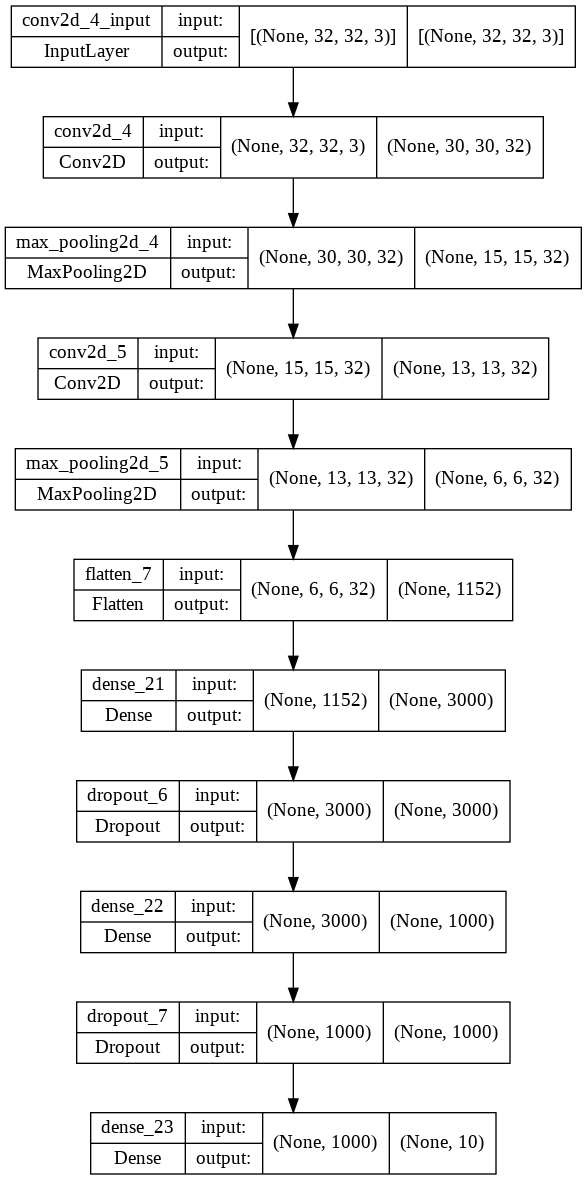

In [84]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

In [85]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, callbacks=[early_stop])

Epoch 1/25
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4458 - accuracy: 0.4747 - val_loss: 1.1991 - val_accuracy: 0.5805
Epoch 2/25
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0495 - accuracy: 0.6311 - val_loss: 0.9941 - val_accuracy: 0.6461
Epoch 3/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8289 - accuracy: 0.7106 - val_loss: 0.9142 - val_accuracy: 0.6849
Epoch 4/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6495 - accuracy: 0.7708 - val_loss: 0.8933 - val_accuracy: 0.6984
Epoch 5/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4731 - accuracy: 0.8336 - val_loss: 1.0144 - val_accuracy: 0.6956
Epoch 6/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3433 - accuracy: 0.8813 - val_loss: 1.0867 - val_accuracy: 0.6976
Epoch 7/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2592 - accuracy: 0.9106 - val_loss: 1.2198 - val

In [86]:
cnn_loss = pd.DataFrame(cnn.history.history)
cnn_loss

,loss,accuracy,val_loss,val_accuracy
0,1.445846,0.47468,1.199141,0.5805
1,1.049469,0.63108,0.994140,0.6461
2,0.828903,0.71060,0.914242,0.6849
3,0.649494,0.77084,0.893292,0.6984
4,0.473104,0.83356,1.014367,0.6956
5,0.343264,0.88130,1.086660,0.6976
6,0.259150,0.91056,1.219844,0.6964
7,0.200952,0.93152,1.321268,0.6993
8,0.177184,0.93902,1.523996,0.6887


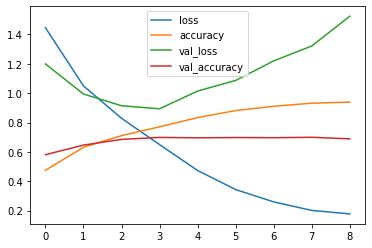

In [87]:
cnn_loss.plot()

In [88]:
cnn_pred = cnn.predict(X_test)
pred_classes_cnn = [np.argmax(element) for element in cnn_pred]

In [89]:
print(classification_report(pred_classes_cnn, y_test))
print(confusion_matrix(pred_classes_cnn, y_test))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       902
           1       0.80      0.83      0.82       962
           2       0.57      0.60      0.59       957
           3       0.52      0.46      0.49      1138
           4       0.67      0.62      0.65      1073
           5       0.56      0.60      0.58       928
           6       0.85      0.68      0.75      1255
           7       0.76      0.75      0.75      1006
           8       0.78      0.82      0.80       943
           9       0.69      0.83      0.75       836

    accuracy                           0.69     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.69      0.69     10000

[[691  22  38  13  14   6   1   8  69  40]
 [ 21 800   1  11   1   3   3   2  25  95]
 [ 75  11 573  53  74  54  30  35  26  26]
 [ 48  20  85 523  70 204  60  64  28  36]
 [ 32   4 111  78 670  55  28  65  19  11]
 [ 14   5  56 170  26 559 

* Got 70% accuracy using CNN 